In [1]:
import pandas as pd
import tarfile
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from helpers import print_versions, load_data_with_columns, extract_year

In [2]:
# Loading data
DATAFOLDER = '../data/'
plot_summaries = load_data_with_columns(DATAFOLDER, 'plot_summaries.txt')
MovieDF = load_data_with_columns(DATAFOLDER, 'movie.metadata.tsv')
CharacterDF = load_data_with_columns(DATAFOLDER, 'character.metadata.tsv')

In [3]:
# Inspect and work with the DataFrame
CharacterDF.head() # Display the first few rows of the DataFrame


,movie_wikipedia_id,movie_freebase_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_map_id,character_freebase_id,actor_freebase_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [4]:
MovieDF.head() 


,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


**Some remarks on the data**
Movie release date not always formatted in the same way. 
Lots of NaN in box office revenue. 
Movie language formatted in a strange way. 


## Lost Film analysis

In [5]:
#import and concatenate the csv of the lost films list from the different decades
#Path to the lost films 
"""
LOST_PATH = DATAFOLDER + 'lost_films/'

df1 = pd.read_csv(LOST_PATH + 'List_of_lost_films_1.csv')
df2 = pd.read_csv(LOST_PATH + 'List_of_lost_films_2.csv')
df3 = pd.read_csv(LOST_PATH + 'List_of_lost_films_3.csv')
df4 = pd.read_csv(LOST_PATH + 'List_of_lost_films_4.csv', error_bad_lines=False)
df5 = pd.read_csv(LOST_PATH + 'List_of_lost_films_5.csv')
df6 = pd.read_csv(LOST_PATH + 'List_of_lost_films_6.csv')
df7 = pd.read_csv(LOST_PATH + 'List_of_lost_films_7.csv')
df8 = pd.read_csv(LOST_PATH + 'List_of_lost_films_8.csv')

# Concatenate the DataFrame to the main DataFrame
LostDF = pd.concat([df1, df2, df3,df5,df6,df7,df8], ignore_index=True)
LostDF
#save it to one file, download it
#LostDF.to_csv(DATAFOLDER + 'all_lost_films.csv', index=False)
"""

"\nLOST_PATH = DATAFOLDER + 'lost_films/'\n\ndf1 = pd.read_csv(LOST_PATH + 'List_of_lost_films_1.csv')\ndf2 = pd.read_csv(LOST_PATH + 'List_of_lost_films_2.csv')\ndf3 = pd.read_csv(LOST_PATH + 'List_of_lost_films_3.csv')\ndf4 = pd.read_csv(LOST_PATH + 'List_of_lost_films_4.csv', error_bad_lines=False)\ndf5 = pd.read_csv(LOST_PATH + 'List_of_lost_films_5.csv')\ndf6 = pd.read_csv(LOST_PATH + 'List_of_lost_films_6.csv')\ndf7 = pd.read_csv(LOST_PATH + 'List_of_lost_films_7.csv')\ndf8 = pd.read_csv(LOST_PATH + 'List_of_lost_films_8.csv')\n\n# Concatenate the DataFrame to the main DataFrame\nLostDF = pd.concat([df1, df2, df3,df5,df6,df7,df8], ignore_index=True)\nLostDF\n#save it to one file, download it\n#LostDF.to_csv(DATAFOLDER + 'all_lost_films.csv', index=False)\n"

In [6]:
LostDF = pd.read_csv(DATAFOLDER + 'all_lost_films.csv')
LostDF

,Year,Film,Director,Cast,Notes,Ref
0,1895,Young Griffo vs. Battling Charles Barnett,Otway Latham,"Young Griffo, Charles Barnett",First American film shown to a paying audience,NaN
1,1896,Arrivée d'un train gare de Vincennes,Georges Méliès,NaN,A French short documentary,NaN
2,1896,L'Arroseur (a.k.a. Watering the Flowers),Georges Méliès,NaN,A short comedy,NaN
3,1896,Barque sortant du port de Trouville,Georges Méliès,NaN,NaN,NaN
4,1896,Bateau-mouche sur la Seine,Georges Méliès,NaN,NaN,NaN
...,...,...,...,...,...,...
102,1977,Kissa Kursi Ka,Amrit Nahata,"Shabana Azmi, Utpal Dutt",The plot revolved around a corrupt and evil po...,NaN
103,1979,Njattadi,Bharath Gopi,"Bharat Murali, K.N. Sreenivasan, Sunil, Girija...",The film is based on the life of the protagoni...,NaN
104,1982,Milagro sa Porta Vaga,Florencio Orbeta,Julie Vega,Religious epic film about Our Lady of Porta Va...,NaN
105,1983,Roy del espacio,"Hector López Carmona, Rafael Ángel Gil and Uli...","José Chorena, Guillermo Coria, Juan Domingo Mé...",Animated Mexican sci-fi film. After its initia...,NaN


In [7]:
#identify the movies of MovieDF that are lost
#TO_DO => identify if same date (can be movies with the same name)
merged_df = pd.merge(MovieDF, LostDF, how='left', left_on='movie_name', right_on='Film', indicator=True)
merged_df

,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres,Year,Film,Director,Cast,Notes,Ref,_merge
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",NaN,NaN,NaN,NaN,NaN,NaN,left_only
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",NaN,NaN,NaN,NaN,NaN,NaN,left_only
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",NaN,NaN,NaN,NaN,NaN,NaN,left_only
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [8]:
# Add a new column "Lost" to MovieDF: 1 if a lost film, 0 otherwise 
#This is done using the indicator: 
MovieDF['Lost'] = (merged_df['_merge'] == 'both').astype(int)

lost_films = MovieDF[MovieDF['Lost']==1]
lost_films

,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres,Lost
273,28327554,/m/0cnxf8t,The Gamblers,1970,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",1
3610,12272453,/m/02vygbp,Honky Tonk,1941,NaN,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hfjk"": ""Western"", ""/m/01g6gs"": ""Black-an...",1
4304,16326663,/m/03wgxy1,Paris,1926-05-24,NaN,67.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1
5051,35712635,/m/0jt4mgg,The Love Racket,1929-12-08,NaN,74.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1
5229,704961,/m/0347wx,Speakeasy,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/0219x_"": ""Indie""}",1
...,...,...,...,...,...,...,...,...,...,...
78318,28371190,/m/0crfmsw,Les chevaux de bois,1896,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1
78618,34099266,/m/0hr16zz,Frozen Justice,1929-10-13,NaN,NaN,{},{},"{""/m/07s9rl0"": ""Drama""}",1
79858,7623653,/m/0kvcnp,Jealousy,1925,NaN,103.0,"{""/m/06ppq"": ""Silent film"", ""/m/04306rv"": ""Ger...","{""/m/084n_"": ""Weimar Republic"", ""/m/0345h"": ""G...","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1
80391,8545989,/m/0277dw5,A Christmas Carol,2000,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01hmnh"": ""Fantasy"", ""/m/0hqxf"": ""Family F...",1


In [9]:
MovieDF['Lost']

0        0
1        0
2        0
3        0
4        0
        ..
81736    0
81737    0
81738    0
81739    0
81740    0
Name: Lost, Length: 81741, dtype: int32

In [10]:
MovieDF['Lost']

0        0
1        0
2        0
3        0
4        0
        ..
81736    0
81737    0
81738    0
81739    0
81740    0
Name: Lost, Length: 81741, dtype: int32

In [11]:
MovieDF['movie_release_date'] = MovieDF['movie_release_date'].apply(extract_year)
MovieDF['movie_release_date'] = MovieDF['movie_release_date'].fillna(0).astype(int)

In [12]:
##ev. TO DO => binning to better see per decade
lost_stats_per_year = MovieDF.groupby(MovieDF['movie_release_date']).apply(lambda x: pd.Series({
    'lost_film_count' : x['Lost'].sum()
}))
#.values_count().get(1, 0)

In [13]:
lost_stats_per_year

,lost_film_count
movie_release_date,
0,6
1010,0
1888,0
1889,0
1890,0
...,...
2012,0
2013,0
2014,0


In [15]:
lost_stats_per_year = lost_stats_per_year.drop([0,1010])

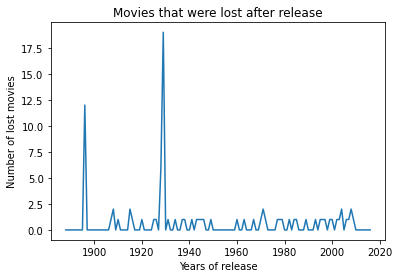

In [16]:
plt.plot(lost_stats_per_year.index,lost_stats_per_year.lost_film_count)
plt.xlabel("Years of release")
plt.ylabel("Number of lost movies")
plt.title("Movies that were lost after release")
plt.show()

It is interesting to see that there are two peaks, and that is occasionnal on the other years. Let's look at the peaks.

In [38]:
lost_stats_per_year.index[lost_stats_per_year.lost_film_count >=5]

Int64Index([1896, 1928, 1929], dtype='int64', name='movie_release_date')

In [47]:
print(lost_stats_per_year[lost_stats_per_year.index == 1896])
print(lost_stats_per_year[lost_stats_per_year.index == 1928])
print(lost_stats_per_year[lost_stats_per_year.index == 1929])


                    lost_film_count
movie_release_date                 
1896                             12
                    lost_film_count
movie_release_date                 
1928                              6
                    lost_film_count
movie_release_date                 
1929                             19


=> look at events that could explain such relatively huge sudden loss.
Wiki: Films may go missing for a number of reasons. One major contributing factor is the common **use of nitrate film until the early 1950s**. This type of film is highly flammable, and there have been several devastating fires, such as the Universal Pictures fire in 1924, the Warner Bros./First National fire in 1933, the British and Dominions Imperial Studios fire in 1936, the 1937 Fox vault fire and the 1965 MGM vault fire. => we could suppose that they perhaps were stored in one of these?

Closer look at the ones in 1928/29:
It is to be noted that many come from the USA, but this is because the source of lost films mainly included US lost movies. 
It could be interesting to see if they come from the same movie director or something. 
Bit difficult to interpret, as this is the movie release date, not the lost date. 

In [53]:
closer_look = MovieDF[(MovieDF['movie_release_date'] == 1928) | (MovieDF['movie_release_date'] == 1929)]

In [54]:
closer_look

,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres,Lost
130,30002176,/m/09pgd14,The Pagan,1929,NaN,100.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""D...",0
213,31256008,/m/0gjd7dp,Tesha,1928,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",0
253,22466518,/m/05zp19b,There It Is,1928,NaN,19.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",0
451,7731853,/m/026b79y,"Laugh, Clown, Laugh",1928,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/01lrrt"": ""Melo...",0
521,15790701,/m/03nt_q7,Eagle of the Night,1928,NaN,102.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/0949yv"": ""Movie se...",0
...,...,...,...,...,...,...,...,...,...,...
80183,28238240,/m/0cp0fjd,Mickey's Big Game Hunt,1928,NaN,20.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film""}",0
81038,29975056,/m/091m8ms,Street of Sin,1928,NaN,70.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",0
81105,19316890,/m/04lf3f2,Old Gray Hoss,1928,NaN,20.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",0
81337,5864450,/m/0f9r25,Gold Diggers of Broadway,1929,2250000.0,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02rd8h3"": ""Goat gland"", ""/m/04t36"": ""Musi...",0


In [25]:
# Bin the data into 5-year intervals and calculate the sum of counts in each interval
binned_data = MovieDF.groupby((MovieDF['movie_release_date'] // 5) * 5)['Lost'].sum()
binned_data = binned_data.drop([0,1010])


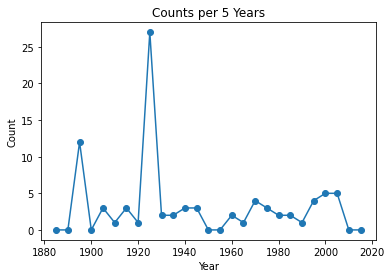

In [26]:
# Plot the binned data
plt.plot(binned_data.index, binned_data.values, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts per 5 Years')

# Show the plot
plt.show()

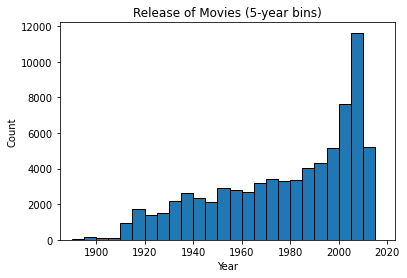

In [29]:
#General Movie release

# Binning the data into 5-year intervals
bins = range(MovieDF['movie_release_date'].min(), MovieDF['movie_release_date'].max() + 6, 5)

# Plotting the histogram
plt.hist(MovieDF['movie_release_date'], bins=bins, edgecolor='black')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Release of Movies (5-year bins)')
plt.xlim([1885,2023])
# Show the plot
plt.show()


**nedd to be very carefull when talking about growing trends (e.g. fantasy and scifi, could also be due to the growing release of movies**

In [18]:
type(lost_stats_per_year)

pandas.core.frame.DataFrame

In [7]:
type(MovieDF['Movie_release_date'][1])

str

### Some ploting

### Genre representation

In [8]:
#import ast 
import json

In [9]:
import ast  # This library is used to safely evaluate the literal syntax tree of a string


# Convert the string representation of the dictionary to an actual dictionary
MovieDF['Movie_genres'] = MovieDF['Movie_genres'].apply(ast.literal_eval)
MovieDF['Movie_languages'] = MovieDF['Movie_languages'].apply(ast.literal_eval)
MovieDF['Movie_countries'] = MovieDF['Movie_countries'].apply(ast.literal_eval)

MovieDF['Movie_languages_list'] = MovieDF['Movie_languages'].apply(lambda x: list(x.values()))
MovieDF['Movie_countries_list'] = MovieDF['Movie_countries'].apply(lambda x: list(x.values()))

In [10]:
MovieDF

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_languages_list,Movie_countries_list
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",[English Language],[United States of America]
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",[Norwegian Language],[Norway]
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",[English Language],[United Kingdom]
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'},[German Language],[Germany]
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{'/m/06ppq': 'Silent film', '/m/02h40lc': 'Eng...",{'/m/09c7w0': 'United States of America'},"{'/m/02hmvc': 'Short Film', '/m/06ppq': 'Silen...","[Silent film, English Language]",[United States of America]
...,...,...,...,...,...,...,...,...,...,...,...
81735,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},{'/m/07s9rl0': 'Drama'},[English Language],[United States of America]
81736,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,{'/m/02h40lc': 'English Language'},"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki...","{'/m/03bxz7': 'Biographical film', '/m/07s9rl0...",[English Language],"[Ireland, United Kingdom]"
81737,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06nbt': 'Satire', '/m/01z4y': 'Comedy'}",[English Language],[United States of America]
81738,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{'/m/06n90': 'Science Fiction', '/m/0gw5n2f': ...",[Japanese Language],[Japan]


In [24]:
import pandas as pd


# Create a new column for the list of genres
MovieDF['Movie_genres_list'] = MovieDF['Movie_genres'].apply(lambda x: list(x.values()))

# Flatten the list of genres
all_genres = [genre for sublist in MovieDF['Movie_genres_list'] for genre in sublist]

# Create a pandas Series from the flattened list
genre_counts = pd.Series(all_genres).value_counts()

genre_counts

Drama                   34007
Comedy                  16349
Romance Film            10234
Black-and-white          9094
Action                   8797
                        ...  
Neorealism                  1
Silhouette animation        1
Chick flick                 1
Statutory rape              1
Buddy Picture               1
Length: 363, dtype: int64

*It can be noted that there are 363 genres, including many that only have one related movie. Let's therefore look at the 20 first prominent genres.*

In [29]:
genre_counts.nlargest(30)

Drama               34007
Comedy              16349
Romance Film        10234
Black-and-white      9094
Action               8797
Thriller             8743
Short Film           8141
World cinema         7155
Crime Fiction        6948
Indie                6897
Documentary          5630
Horror               5279
Silent film          5250
Adventure            4962
Family Film          4598
Action/Adventure     4561
Comedy film          4362
Musical              4160
Animation            3534
Romantic drama       3372
Mystery              3195
Science Fiction      3051
Fantasy              2820
Romantic comedy      2680
War film             2652
Japanese Movies      2322
Western              2226
Crime Thriller       2122
Period piece         1758
Comedy-drama         1720
dtype: int64

In [35]:
top30_genre = genre_counts.nlargest(30)

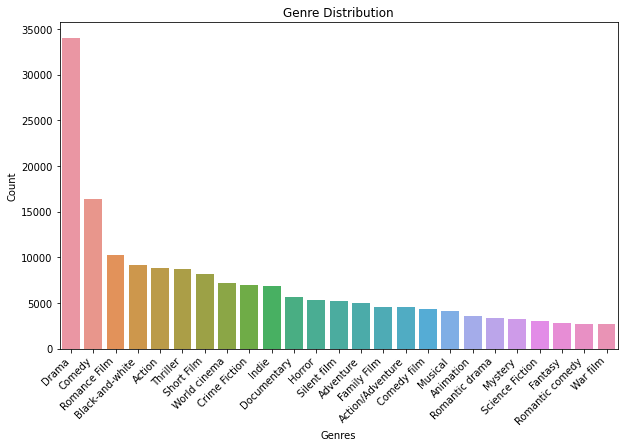

In [39]:
# Barchart
plt.figure(figsize=(10, 6))  
sns.barplot(x=top30_genre.index, y=top30_genre.values)
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()


*remark: Comedy film = Comedy = Comdey-Drama ; ev. regroup them together*

Let's now look at the evolution in time of certain genre of interest. 
- SF : as it is one of the main genres excplicitly dealing with technology
- Fantasy: as new technologies permits better rendering and thus popularity of the genre
- Black and white & Silent Film: to look at the drop coming after the begining of color and sound
- War films

In [44]:
#We are only interested in the release date year

# Extract the year from each cell
MovieDF['Movie_release_date'] = MovieDF['Movie_release_date'].str.extract(r'(\d{4})')

# Convert the 'release_year' column to numeric values
MovieDF['Movie_release_date'] = pd.to_numeric(MovieDF['Movie_release_date'], errors='coerce')

In [45]:
MovieDF['Movie_release_date']

0        2000.0
1        1988.0
2        1987.0
3        1983.0
4        1913.0
          ...  
81735    2011.0
81736    2011.0
81737    1972.0
81738    1992.0
81739    2002.0
Name: Movie_release_date, Length: 81740, dtype: float64

In [57]:
MovieDF['Movie_genres_list']
pd.Series([genre for sublist in MovieDF['Movie_genres_list'] for genre in sublist]).value_counts().get('Science Fiction', 0)

3051

In [62]:
genre_stats_per_year = MovieDF.groupby(MovieDF['Movie_release_date']).apply(lambda x: pd.Series({
    'SF': pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('Science Fiction', 0),
    'Fantasy': pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('Fantasy', 0),
    'Black-and-white': pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('Black-and-white', 0),
    'Silent film':pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('Silent film', 0),
    'War film':pd.Series([genre for sublist in x['Movie_genres_list'] for genre in sublist]).value_counts().get('War film', 0)
}))

In [64]:
genre_stats_per_year

,SF,Fantasy,Black-and-white,Silent film,War film
Movie_release_date,,,,,
1010.0,0,0,0,0,0
1888.0,0,0,1,1,0
1889.0,0,0,1,1,0
1890.0,0,0,0,2,0
1891.0,0,0,0,1,0
...,...,...,...,...,...
2012.0,42,45,2,3,13
2013.0,23,13,0,0,2
2014.0,1,3,0,0,0


We notice one outliar released in 1010. We drop it to better visualize the years of interest. 

In [82]:
genre_stats_per_year = genre_stats_per_year.drop([1010])

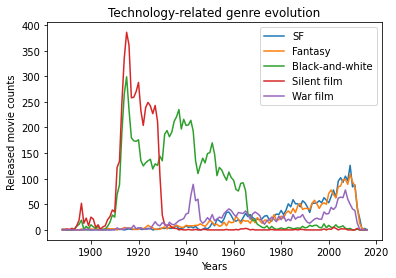

In [88]:
plt.plot(genre_stats_per_year.index, genre_stats_per_year.SF, label = 'SF')
plt.plot(genre_stats_per_year.index, genre_stats_per_year.Fantasy, label = 'Fantasy')
plt.plot(genre_stats_per_year.index, genre_stats_per_year['Black-and-white'], label = 'Black-and-white')
plt.plot(genre_stats_per_year.index, genre_stats_per_year['Silent film'], label = 'Silent film')
plt.plot(genre_stats_per_year.index, genre_stats_per_year['War film'], label = 'War film')


plt.xlabel("Years")
plt.ylabel("Released movie counts")
plt.title("Technology-related genre evolution")
plt.legend()
plt.show()

In [15]:
stats_by_gender= CharacterDF.groupby(CharacterDF['Actor_gender']).apply(lambda x: pd.Series({
    'average_height': x['Actor_height'].mean(), 'std_height': x['Actor_height'].std()
}))

#stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({'average_wg': x['worldwide_gross'].mean(), 'std_wg': x['worldwide_gross'].std()
   

In [16]:
stats_by_gender

,average_height,std_height
Actor_gender,,
F,1.659008,0.068705
M,1.863798,5.499429


In [ ]:
plt.boxplot(stats_by_gender['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

In [31]:
nb_men = CharacterDF[CharacterDF.Actor_gender == 'M'].shape[0]
nb_women = CharacterDF[CharacterDF.Actor_gender == 'F'].shape[0]
#CharacterDF.plot.pie(y='Actor gender')

In [33]:
print(nb_men,nb_women,CharacterDF.shape[0])
print(nb_women+nb_men)
#lot of missing data, or non-binary?

270257 134802 450668
405059


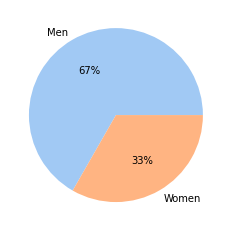

In [35]:
data = [nb_men,nb_women]
labels =['Men', 'Women']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Actor_height', ylabel='Actor_age_movie_release'>

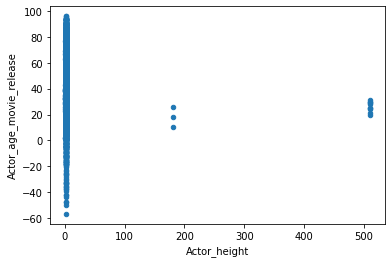

In [38]:
CharacterDF.plot(x= 'Actor_height', y= 'Actor_age_movie_release', kind = 'scatter')

<AxesSubplot:ylabel='Frequency'>

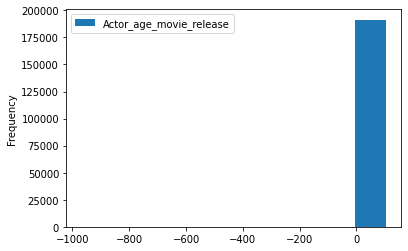

In [41]:
CharacterDF[CharacterDF.Actor_gender == 'M'].plot(y = 'Actor_age_movie_release',kind = 'hist')

### Add the tvtrope column

In [ ]:
import pandas as pd
import json

# Read the text file into a DataFrame
with open('your_text_file.txt', 'r') as file:
    lines = file.readlines()

data = []
for line in lines:
    parts = line.strip().split('\t')
    character = parts[0]
    info_dict = json.loads(parts[1])
    data.append({'character': character, **info_dict})

new_df = pd.DataFrame(data)

# Now, let's assume you have an existing DataFrame called 'existing_df'

# Merge the new DataFrame with the existing DataFrame using the 'character' column as the key
merged_df = pd.merge(existing_df, new_df, on='character', how='left')

# 'how' parameter specifies how you want to merge:
# - 'left' means you want to keep all rows from the 'existing_df' and add matching rows from 'new_df' if they exist.

# Print the resulting DataFrame
print(merged_df)
